## Handling CSV data and accessing APIs

In [1]:
with open ('test01.csv', 'r') as reader:
    for line in reader:
        print (len(line))

10
10
10


In [3]:
with open ('test01.csv', 'r') as reader:
    for line in reader:
        fields=line.strip().split(',')
        print (fields)

['1901', '12.3']
['1902', '45.6']
['1903', '78.9']


In [42]:
import requests
import csv

In [43]:
url='http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv'
response=requests.get(url)
if response.status_code != 200:
    print ('Failed:', response.status_code)
else:
    wrapper = csv.reader (response.text.strip().split('\n'))
    for record in wrapper:
        if record[0] != 'year':
            year=int(record[0])
            value=float(record[1])
            print(year,value)

1901 -7.67241907119751
1902 -7.862711429595947
1903 -7.910782814025879
1904 -8.155729293823242
1905 -7.547311305999756
1906 -7.684103488922119
1907 -8.413553237915039
1908 -7.790929317474365
1909 -8.23930549621582
1910 -7.774611473083496
1911 -8.114446640014648
1912 -7.885402679443359
1913 -7.987940311431885
1914 -7.965937614440918
1915 -7.144039154052734
1916 -8.132978439331055
1917 -8.499914169311523
1918 -8.204662322998047
1919 -8.035985946655273
1920 -7.830679893493652
1921 -7.685777187347412
1922 -8.334989547729492
1923 -8.022125244140625
1924 -7.574568271636963
1925 -7.951625823974609
1926 -7.792789459228516
1927 -7.961727142333984
1928 -7.237975120544434
1929 -8.123651504516602
1930 -7.302305698394775
1931 -6.646339416503906
1932 -7.821688652038574
1933 -8.693134307861328
1934 -7.964327335357666
1935 -8.166967391967773
1936 -8.59422492980957
1937 -7.3392534255981445
1938 -6.856348991394043
1939 -7.669107913970947
1940 -6.799381256103516
1941 -7.233104705810547
1942 -7.0978126525

In [44]:
def annual_mean_temp(country):
    '''Get the annual mean temp for a country given the 3 char ISO country code'''

    url='http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/' + country + '.csv'
    response=requests.get(url)
    if response.status_code != 200:
        print ('Failed:', response.status_code)
    else:
        wrapper = csv.reader (response.text.strip().split('\n'))
        results =[]
        for record in wrapper:
            if record[0] != 'year':
                year=int(record[0])
                value=float(record[1])
                results.append([year, value])
        return results

In [45]:
# Get an error here because BLG isn't a valid country code
# Will need to fix this...
canada = annual_mean_temp('BLG')
print ('First three entries:', canada[:3])





IndexError: list index out of range

In [46]:
def annual_mean_temp(country):
    '''Get the annual mean temp for a country given the 3 char ISO country code'''

    url='http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/' + country + '.csv'
    response=requests.get(url)
    results =[]
    
    if len(response.text) > 0: #Good data
        wrapper = csv.reader (response.text.strip().split('\n'))
        for record in wrapper:
            if record[0] != 'year':
                year = int(record[0])
                value = float(record[1])
                results.append([year, value])
    return results
    
    

In [47]:
print ('Number of records for France', len(annual_mean_temp('FRA')))

Number of records for France 112


In [48]:
print ('Number of records for Belgerum', len(annual_mean_temp('BLG')))
# Zero length because Belgerum doesn't exist...

Number of records for Belgerum 0


In [ ]:
#Write a function to compare surface temps for different countries

In [49]:
def diff_countries(country_a, country_b):
    '''Retrieves lists of [year, value] pairs and returns [year, difference]'''
    country_a_data = annual_mean_temp(country_a)
    country_b_data = annual_mean_temp(country_b)
    num_years = len(country_a_data)
    results = []
    
    for index in range(num_years):
        country_a_year, country_a_value = country_a_data[index]
        country_b_year, country_b_value = country_b_data[index]
        difference = country_a_value - country_b_value
        results.append([country_a_year, difference])
        
    return results

In [50]:
new_results = diff_countries('BEL', 'GBR')

In [51]:
print ('First three records:', new_results[:3])

First three records: [[1901, 0.7147941589355469], [1902, 0.7281551361083984], [1903, 1.2643241882324219]]


In [52]:
from matplotlib import pyplot as plt
india = annual_mean_temp('IND')
aze = annual_mean_temp('AZE')

In [53]:
print ('First three records:', india[:3])

First three records: [[1901, 23.736392974853516], [1902, 23.920108795166016], [1903, 23.434696197509766]]


In [54]:
print ('First three records:', aze[:3])

First three records: [[1901, 11.486827850341797], [1902, 10.887903213500977], [1903, 10.655241966247559]]


In [55]:
diff_data = diff_countries('IND', 'AZE')

In [56]:
print ('First three records:', diff_data[:3])

First three records: [[1901, 12.249565124511719], [1902, 13.032205581665039], [1903, 12.779454231262207]]


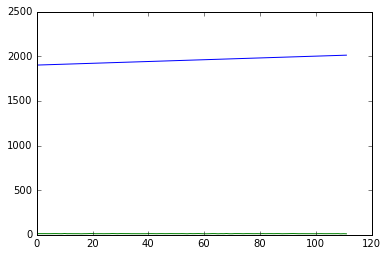

In [39]:
%matplotlib inline
plt.plot(diff_data)
plt.show()

In [ ]:
# This doesn't look right- we are trying to plot the columns as two seperate sets of data

In [40]:
# Plot the first column against the second column
# Convert the list to a numpy array first
import numpy as np
diff_array = np.array(diff_data)


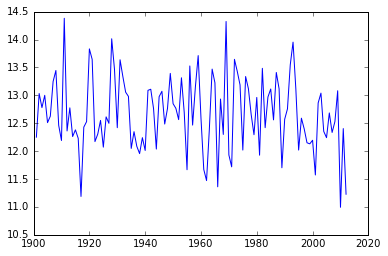

In [57]:
# Plot all the entries in column 0 against all the entries in column 1
plt.plot(diff_array[:, 0], diff_array[:, 1])
plt.show()